In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import warnings
from sklearn.metrics.pairwise        import cosine_similarity
from sklearn.metrics.pairwise        import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Se lee el archivo y ae visualiza
df_final = pd.read_csv('data_final.csv')
df_final.head()

,app_name,price,id,release_year,Indie,Action,Casual,Adventure,Strategy,Simulation,...,playtime_forever,playtime_2weeks,funny,last_edited,item_id,helpful,recommend,review,posted_year,sentiment_analysis
0,Half-Life,9.99,70,1998,0,1,0,0,0,0,...,4,0,NaN,NaN,251990,1 of 1 people (100%) found this review helpful,True,It's good to be a magical queen... if you surv...,2014,2
1,Half-Life,9.99,70,1998,0,1,0,0,0,0,...,21,0,2 people found this review funny,NaN,332800,194 of 282 people (69%) found this review helpful,True,10/10 would take kids here for birthday,2014,1
2,Half-Life,9.99,70,1998,0,1,0,0,0,0,...,21,0,NaN,NaN,319630,1 of 2 people (50%) found this review helpful,True,"Well for starters, when I write reviews they a...",2015,2
3,Half-Life,9.99,70,1998,0,1,0,0,0,0,...,21,0,NaN,NaN,6020,No ratings yet,True,10/10 lets you cut people into sushi if the pr...,2015,1
4,Half-Life,9.99,70,1998,0,1,0,0,0,0,...,21,0,NaN,NaN,55230,No ratings yet,True,"10/10 has Sasha Grey, so fun for whole family.",2015,2


In [4]:
# Se suprimen todos los warnings
warnings.filterwarnings("ignore")

In [5]:
# Se crea una lista con las variables numéricas
df_num= df_final.select_dtypes(include = (int,float))
df_num.drop(columns=['id', 'item_id','steam_id', 'Action', 'Adventure', 'Casual', 'Design &amp; Illustration', 'Early Access', 'Free to Play', 'Indie',
       'Massively Multiplayer', 'RPG', 'Racing', 'Simulation','Sports', 'Strategy', 'Utilities'],inplace=True)

In [6]:
#Se analizan los datos, los id no se tienen en cuenta
df_num.describe()


,price,release_year,playtime_forever,playtime_2weeks,posted_year,sentiment_analysis
count,38154.000000,38154.000000,38154.000000,38154.000000,38154.000000,38154.000000
mean,12.041047,2004.917152,4998.342087,22.775122,2014.158253,1.359019
std,5.127726,2.892101,13852.147255,207.112663,0.834643,0.807829
min,0.000000,1990.000000,1.000000,0.000000,2010.000000,0.000000
25%,9.990000,2004.000000,151.000000,0.000000,2014.000000,1.000000
50%,9.990000,2006.000000,727.000000,0.000000,2014.000000,2.000000
75%,9.990000,2006.000000,3241.750000,0.000000,2015.000000,2.000000
max,160.910000,2017.000000,336763.000000,9089.000000,2015.000000,2.000000


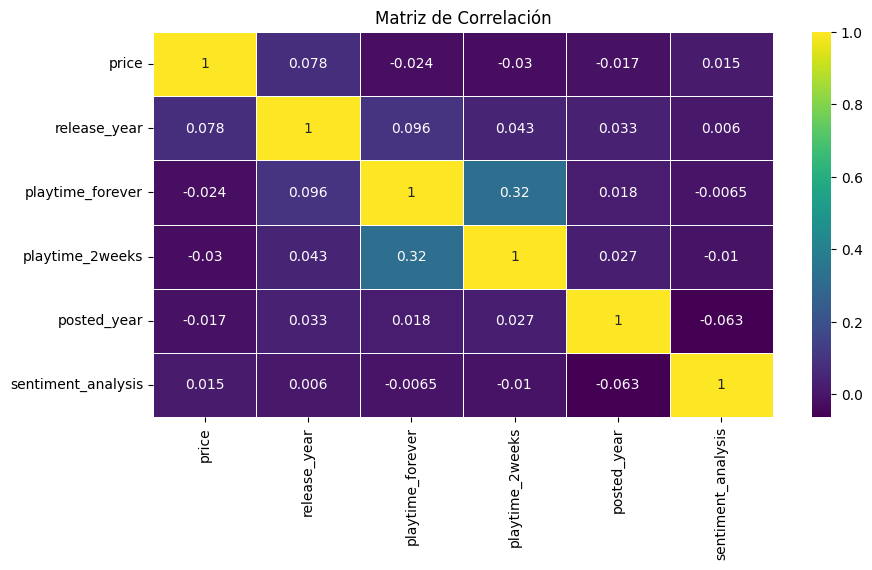

In [7]:
# Se calcula la matriz de correlación
correlation_matrix = df_num.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()
#Conclusion: Se puede observar que no existe una clara correlacion entre los datos

In [8]:
# Se calcula la frecuencia de cada género sumando las columnas
frecuencia_generos = df_final[['Indie','Action','Casual','Adventure','Strategy','Simulation','RPG','Free to Play','Early Access' ,'Sports']].sum()
df_frecuencia_generos = pd.DataFrame({'Genero': frecuencia_generos.index, 'Frecuencia': frecuencia_generos.values})
df_frecuencia_generos = df_frecuencia_generos.sort_values(by='Frecuencia', ascending=False)

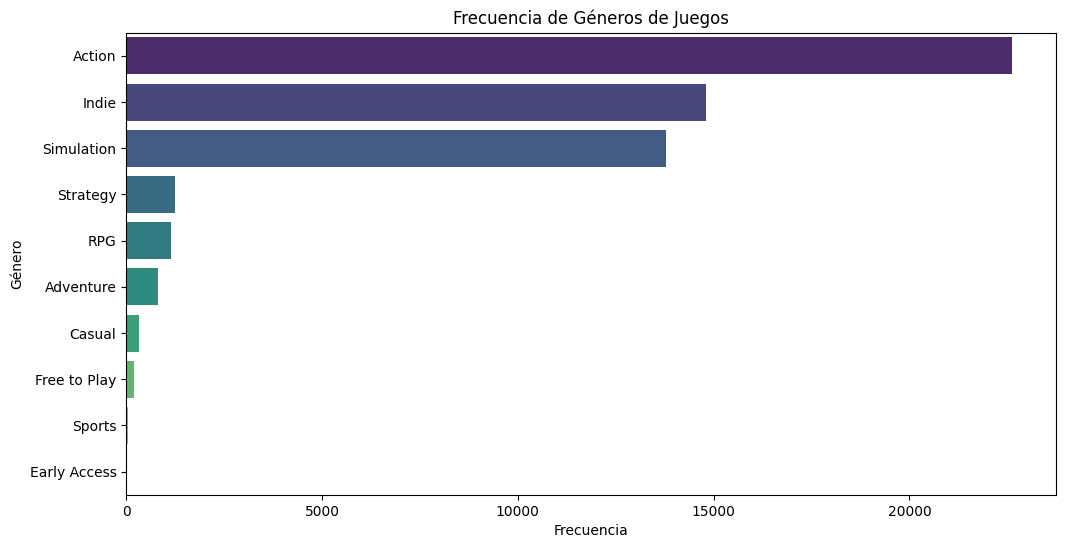

In [9]:
plt.figure(figsize=(12, 6))
# Se crea el gráfico de barras utilizando Seaborn
sns.barplot(x='Frecuencia', y='Genero', data=df_frecuencia_generos, palette='viridis')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Frecuencia de Géneros de Juegos')
plt.show()

Text(0, 0.5, 'Año')

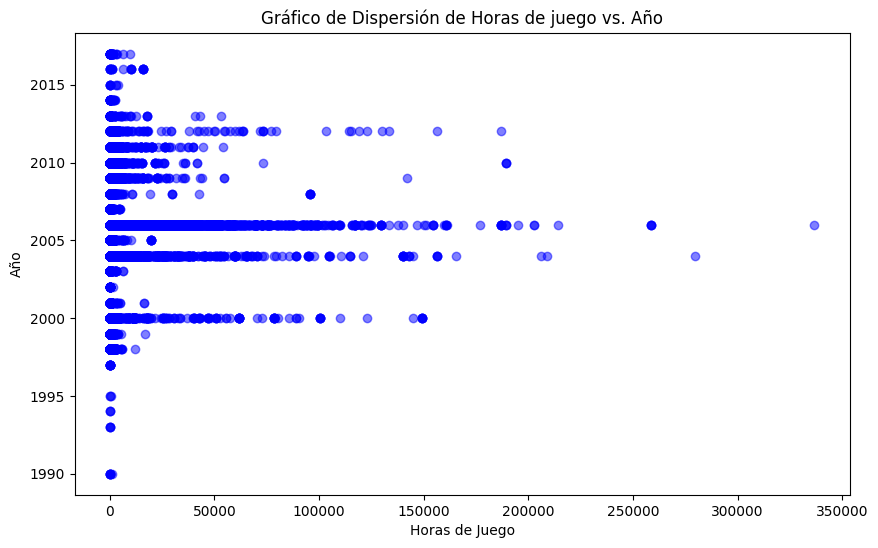

In [10]:
plt.figure(figsize=(10, 6))
# Se crea un scatter plot de playtime vs. price
plt.scatter(df_num['playtime_forever'], df_num['release_year'], color='blue', alpha=0.5)

# Personaliza el gráfico con etiquetas y título
plt.title('Gráfico de Dispersión de Horas de juego vs. Año')
plt.xlabel('Horas de Juego')
plt.ylabel('Año')

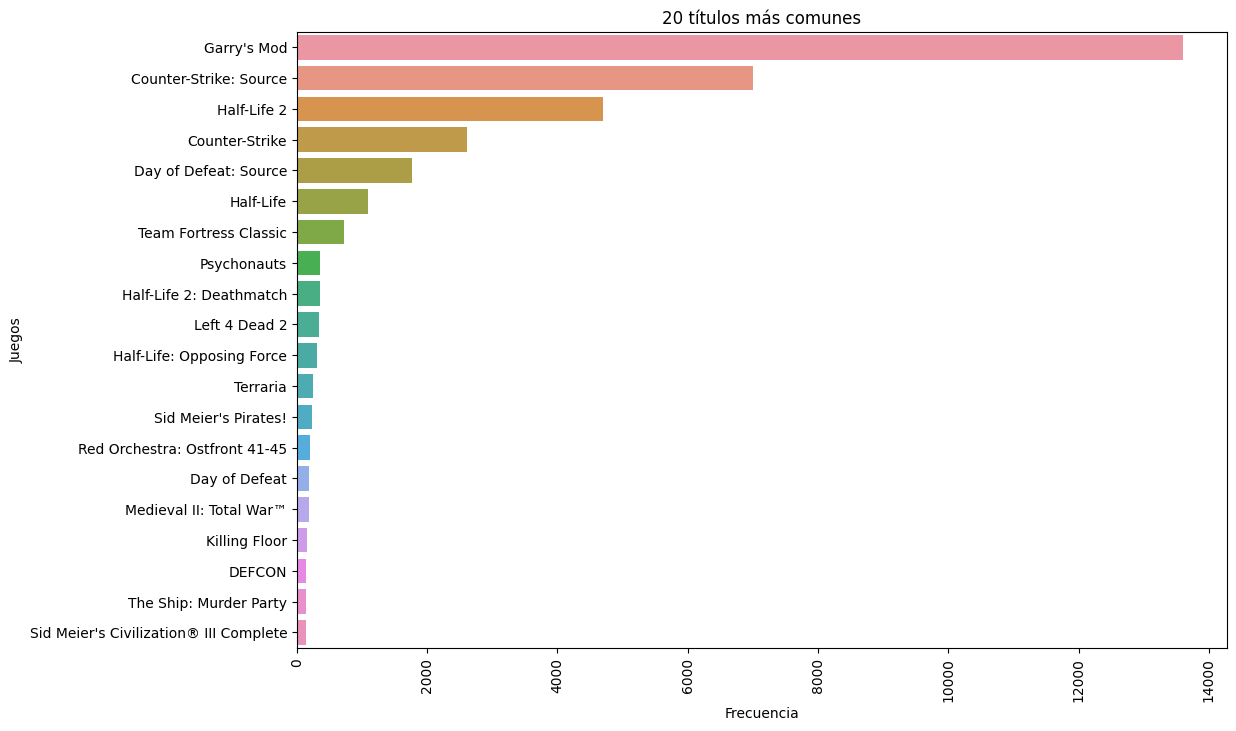

In [11]:
#Se crea un grafico de los juegos mas jugados
top_titles = df_final['app_name'].value_counts().nlargest(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_titles.values, y=top_titles.index)
plt.xlabel('Frecuencia')
plt.ylabel('Juegos')
plt.title('20 títulos más comunes')
plt.xticks(rotation=90)
plt.show()

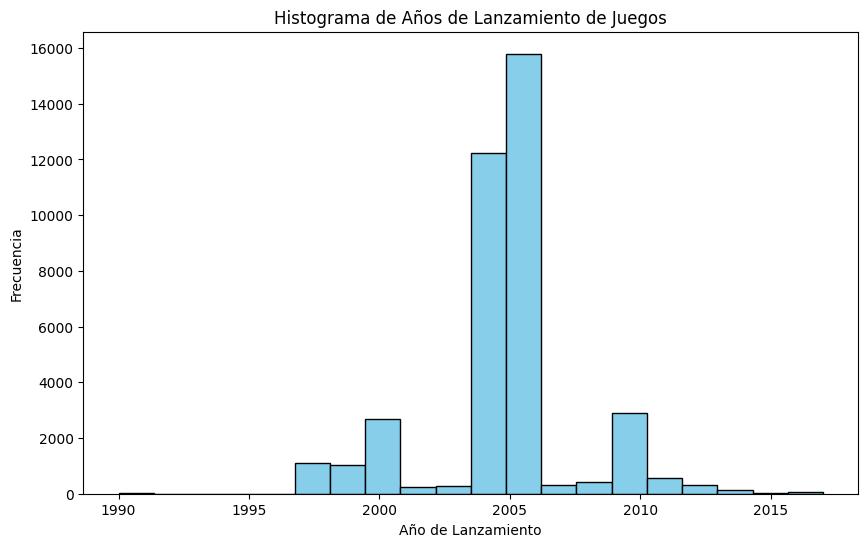

In [12]:
plt.figure(figsize=(10, 6))
# Crea el histograma de años de lanzamiento
plt.hist(df_final['release_year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Años de Lanzamiento de Juegos')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Frecuencia')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\galve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


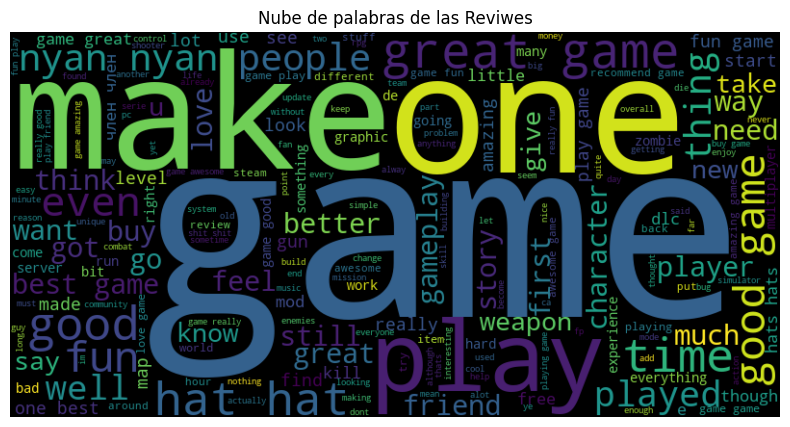

In [13]:
#Se crea una nube de palabras que se destacan en las reviews
nltk.download('stopwords')
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords]
    return ' '.join(tokens)
df_final['processed_review'] = df_final['review'].apply(preprocess_text)
all_reviews = ' '.join(df_final['processed_review'])

wordcloud = WordCloud(width=800, height=400).generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de las Reviwes')
plt.show()

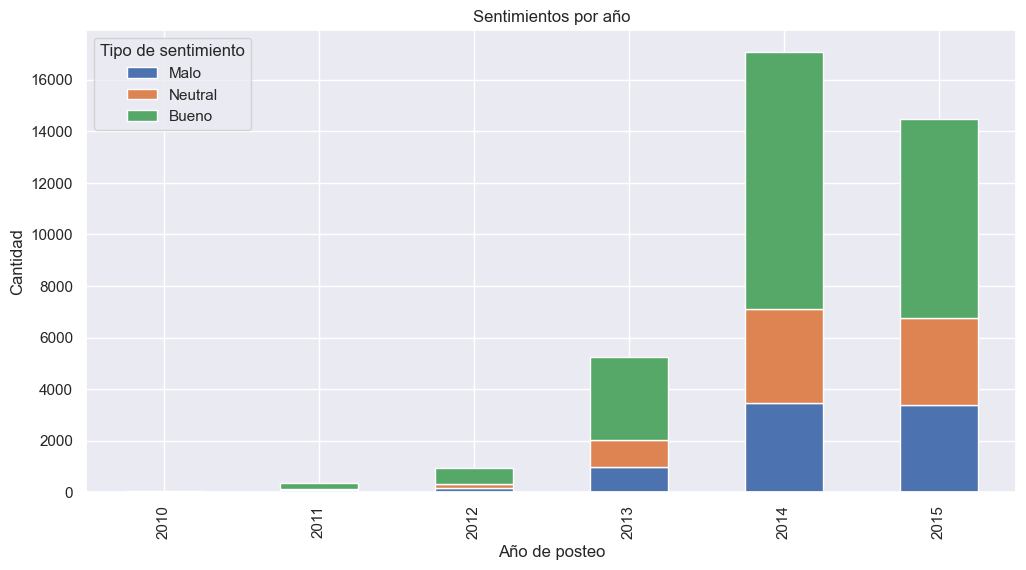

In [14]:
#Se crea un grafico de barras la los sentimientos en los años
sentimiento_colores = {
    0: ('Malo'),  
    1: ('Neutral'),
    2: ('Bueno') 
}

grouped_data = df_final.groupby(['posted_year', 'sentiment_analysis']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='posted_year', columns='sentiment_analysis', values='count')
sns.set(style='darkgrid')
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))

handles, labels = ax.get_legend_handles_labels()
custom_labels = [sentimiento_colores[int(label)] for label in labels]
ax.legend(handles, custom_labels, title='Tipo de sentimiento', loc='upper left')
plt.ylabel('Cantidad')
plt.xlabel('Año de posteo')
plt.title('Sentimientos por año')
plt.show()

MODELOS DE MACHINE LEARNING IMPLEMENTADO EN LA API


In [15]:
#Se crea una muestra para el modelo
muestra = df_final.head(4000) 

In [16]:
# Se crea el modelo de machine learning con Scikit-Learn
tfidf = TfidfVectorizer(stop_words='english')
muestra=muestra.fillna("")

tdfid_matrix = tfidf.fit_transform(muestra['review'])
cosine_similarity = linear_kernel( tdfid_matrix, tdfid_matrix)

In [25]:
# Se crea la funcion de recomendación de 5 juegos recomendados similares al id del juego ingresado.
def recomendacion_juego(id_producto):
    if id_producto not in muestra['steam_id'].values:
        return {'mensaje': 'No existe el id del juego.'}

    idx = muestra[muestra['steam_id'] == id_producto].index[0]
    sim_cosine = list(enumerate(cosine_similarity[idx]))
    sim_scores = sorted(sim_cosine, key=lambda x: x[1], reverse=True)
    sim_ind = [i for i, _ in sim_scores[1:6]]
    sim_juegos = muestra['app_name'].iloc[sim_ind].values.tolist()

    return {'juegos recomendados': sim_juegos}
#Se imprimen los nombres de los juegos para el id de usuario que se pasa
recomendacion_juego(76561198030567998)

{'juegos recomendados': ["Garry's Mod",
  "Garry's Mod",
  "Garry's Mod",
  "Garry's Mod",
  'Half-Life']}

In [26]:
# Se crea la funcion de recomendación de 5 juegos recomendados para el usuario ingresado.
def recomendacion_usuario(id: int):
    if id not in muestra['id'].values:
        return {'mensaje': 'No existe el id del juego.'}
    
    titulo = muestra.loc[muestra['id'] == id, 'app_name'].iloc[0]
    idx = muestra[muestra['app_name'] == titulo].index[0]
    sim_cosine = list(enumerate(cosine_similarity[idx]))
    sim_scores = sorted(sim_cosine, key=lambda x: x[1], reverse=True)
    sim_ind = [i for i, _ in sim_scores[1:6]]
    sim_juegos = muestra['app_name'].iloc[sim_ind].values.tolist()
    return {'juegos recomendados': list(sim_juegos)}

print(recomendacion_usuario(70))

{'juegos recomendados': ["Garry's Mod", 'The Ship: Murder Party', 'The Ship: Murder Party', 'DEFCON', 'DEFCON']}
